# Ex06 - `[Iury] (0040411)`

Sistemas lineares (SLITs) de tempo discreto.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.


**Instruções:**
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.
- Não inclua mais células do que o especificado e mantenha a organização.
- Use `plt.figure(figsize=(10,2))` para ajustar o tamanho das figuras e sempre coloque rótulos.

**Objetivos**
- Implementar diferentes sistemas discretos
- Analisar os sistemas implementados

## Dados epidemiológicos

O código abaixo carrega os dados atualizados da covid-19 no Brasil (Fonte: https://github.com/datasets/covid-19).

In [142]:
# Importa dados
import pandas as pd, numpy as np
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
dados = pd.read_csv(URL_DATASET)

# datas
datas = dados[dados['Country'] == 'Brazil']['Date']

# número de casos confirmados
brCas = dados[dados['Country'] == 'Brazil']['Confirmed'].to_numpy(dtype=np.float64)

# número de mortes
brMor = dados[dados['Country'] == 'Brazil']['Deaths'].to_numpy(dtype=np.float64)

dados[dados['Country'] == 'Brazil'].head(-1)

,Date,Country,Confirmed,Recovered,Deaths
19584,2020-01-22,Brazil,0,0,0
19585,2020-01-23,Brazil,0,0,0
19586,2020-01-24,Brazil,0,0,0
19587,2020-01-25,Brazil,0,0,0
19588,2020-01-26,Brazil,0,0,0
...,...,...,...,...,...
20394,2022-04-11,Brazil,30161909,0,661576
20395,2022-04-12,Brazil,30184286,0,661741
20396,2022-04-13,Brazil,30210934,0,661904
20397,2022-04-14,Brazil,30234024,0,662043


Existem três variáveis (mensais) do código acima que você utilizará:
- `brCas`: número total de casos confirmados
- `brMor`: número total de mortes

<mark>**Fazer:** importe as bibliotecas necessárias e plote os gráficos das duas variáveis acima. Use `figsize=(10,2)`.</mark>

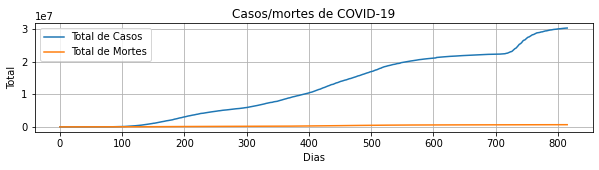

In [143]:
### SEU CÓDIGO COMEÇA AQUI ###

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal

#Gráficos no tempo casos e mortes
plt.figure(figsize = (10,2))
plt.plot(brCas);
plt.plot(brMor);
plt.title("Casos/mortes de COVID-19")
plt.ylabel("Total")
plt.xlabel("Dias")
plt.legend(["Total de Casos","Total de Mortes"], loc=2)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do número total de casos confirmados, número total de mortes. Todos num mesmo gráfico, com legendas, rótulos e dimensões apropriadas.
---

## Sistema de diferenças regressivas (casos diários)

Para melhor analisarmos os dados, plote os dados *diários* no lugar dos dados *totais*. Para fazer isso, implemente um sistema FIR de diferenças regressivas, dado por:

$$ y(k) = u(k) - u(k-1) $$

Obs.: note que esse sistema pode ser implementado usando um laço `for` convencional; ou pode ser implementado de forma *vetorizada*, usando operações com vetores; ou ainda, usando a função `dlsim` com `dlti`.

<mark>**Fazer:** implemente o sistema de diferenças regressivas usando a função `dlti` (você precisará transformar a equação para o domínio z) e plote o diagrama de Bode (módulo e fase) do sistema usando `dbode`. Use `figsize=(10,2)`.</mark>

/usr/local/lib/python3.7/dist-packages/scipy/signal/ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


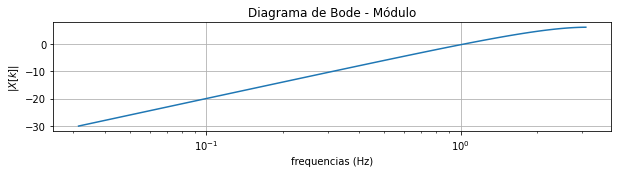

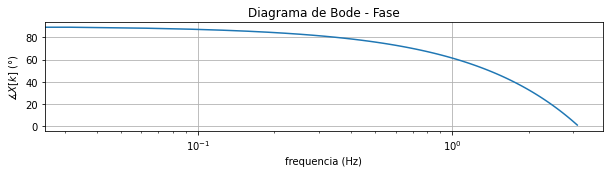

In [144]:
### SEU CÓDIGO COMEÇA AQUI ###

num = [1, -1];
den = [1, 0];

sys1 = signal.dlti(num, den);


w1, mag1, phase1 = signal.dbode (sys1); #Transforma pro dominio Z atraves do Bode

#bode modulo
plt.figure(figsize=(10,2))
plt.semilogx(w1, mag1)
#plt.xlim(10**(-2),1)
plt.xlabel("frequencias (Hz)")
plt.ylabel("$|X[k]|$")
plt.title("Diagrama de Bode - Módulo")
plt.grid(1);

#bode Fase
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (Hz)")
plt.title("Diagrama de Bode - Fase")
plt.semilogx(w1, phase1)
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Diagrama de Bode (módulo e fase) do sistemas de diferenças regressivas. O gráfico deve ter legendas, ***rótulos*** (expresse a unidade de frequência corretamente!) e dimensões apropriadas.
---

## Casos diários

<mark>**Fazer:** passe os sinais `brCas` e `brMor` no sistema de diferenças regressivas implementado e mostre em três gráficos diferentes: os casos diários, mortes diárias e recuperados diários. Use `figsize=(9,2)`.</mark>

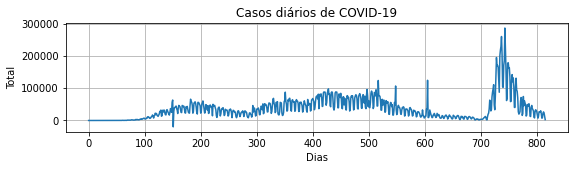

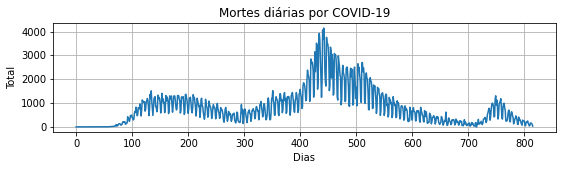

In [145]:
### SEU CÓDIGO COMEÇA AQUI ###

ty_brCas, y_brCas = signal.dlsim(sys1, brCas)
ty_brMor, y_brMor = signal.dlsim(sys1, brMor)

#grafico casos diarios
plt.figure(figsize = (9,2))
plt.plot(ty_brCas, y_brCas);
plt.title("Casos diários de COVID-19")
plt.ylabel("Total")
plt.xlabel("Dias")
plt.grid(1);

#grafico mortes diarias
plt.figure(figsize = (9,2))
plt.plot(ty_brMor, y_brMor);
plt.title("Mortes diárias por COVID-19")
plt.ylabel("Total")
plt.xlabel("Dias")
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do número de casos confirmados diários
1. Gráfico do número de mortes diárias
---

## Análise na frequência

Agora faça análise desses sinais no domínio da frequência.

**ATENÇÃO**: a partir de agora, use os ***dados diários*** apenas, obtidos com o sistema de diferenças regressivas, não use os dados de mortes/casos totais não!

<mark>**Fazer:** faça a FFT (somente módulo) dos sinais acima. Sabendo que o período de amostragem é de um dia, represente o eixo horizontal da FFT em uma unidade apropriada (ex.: "1/dia").</mark>

In [146]:
### SEU CÓDIGO COMEÇA AQUI ###

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft

#FFT
def fourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):

    N = len(x)
    T = t[1] - t[0]

    if Nfft == None:
      Nfft = N

    X_f = fft(x, n=Nfft)
    X_f = X_f/N # corrige amplitude do sinal
    X_f = X_f[:Nfft//2]
    X_f[1:] = 2*X_f[1:]

    if Hz == True:
      f0 = 1/(Nfft*T) #freq em Hz
      fHz = np.arange(Nfft)*f0 #freq em Hz
      f = fHz[:Nfft//2]
    else:
      w0 = 2*np.pi/(Nfft*T) #freq em rad/s
      wRad = np.arange(Nfft)*w0 #freq em rad/s
      f = wRad[:Nfft//2]

    if dB == True:
      mag = 20*np.log10(np.abs(X_f)) #modulo no dominio da frequencia em dB
    else:
      mag = np.abs(X_f) #modulo no dominio da frequencia em dB
      
    if deg == True:
      pha = np.angle(X_f, deg=1) #fase no dominio da frequencia 
    else:
      pha = np.angle(X_f, deg=0)
           
    return mag, pha, f;

    #ZOOM NO SINAL: PLT.XLIM (50,70) -> OBSERVA SO O RANGE DE 50 A 70 DO DOM DO TEMPO
    #f = 1/T -> frequencia pelo periodo


### FIM DO CÓDIGO ###

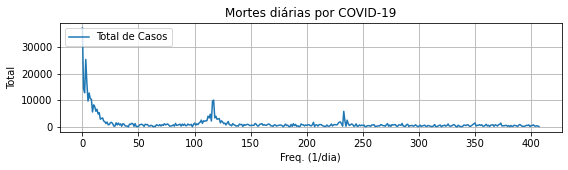

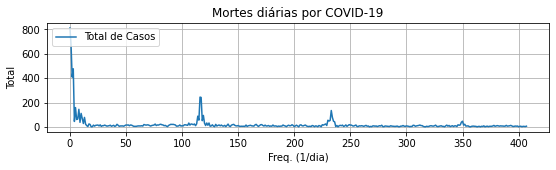

In [147]:
### SEU CÓDIGO COMEÇA AQUI ###

#reshape para tirar segunda coluna da matriz formada
y_brCas = y_brCas.reshape(-1)
y_brMor = y_brMor.reshape(-1)

#passa numeros de casos e mortes pela FFT
mag_cas, pha_cas, f_cas = fourier(y_brCas, ty_brCas, Hz=True, dB=False, deg=False, Nfft=None);
mag_mor, pha_mor, f_mor = fourier(y_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); 

#plota numero de casos na frequencia de 1/dia
plt.figure(figsize = (9,2))
plt.plot(mag_cas)
plt.title("Mortes diárias por COVID-19")
plt.ylabel("Total")
plt.xlabel("Freq. (1/dia)")
plt.legend(["Total de Casos","Total de Mortes"], loc=2)
plt.grid(1);

#plota numero de mortes na frequencia de 1/dia
plt.figure(figsize = (9,2))
plt.plot(mag_mor)
plt.title("Mortes diárias por COVID-19")
plt.ylabel("Total")
plt.xlabel("Freq. (1/dia)")
plt.legend(["Total de Casos","Total de Mortes"], loc=2)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. FFT (módulo) do número de casos confirmados
1. FFT (módulo) do número de mortes
---

## Sistemas de tempo discreto

Usando as funções da biblioteca de processamento de sinais (https://docs.scipy.org/doc/scipy/reference/signal.html), implemente os seguintes sistemas:
1. Sistema de diferenças regressivas
1. Sistema média móvel causal de 7 amostras (uma semana)
1. Sistema média móvel não causal de 7 amostras (uma semana)

**ATENÇÃO**: os sistemas acima devem ser implementados para os ***dados diários*** apenas, obtidos com o primeiro sistema de diferenças regressivas, não use os dados de mortes/casos totais não! Neste ponto, deve ser implementado OUTRO sistema de diferenças regressivas -- e também os demais sistemas.

**ATENÇÃO**: as funções usadas para sistemas contínuos são diferentes das usadas para sistemas discretos.

Após implementar os três sistemas acima, para cada um deles faça:
- Plote o diagrama de Bode do sistema (módulo e fase)
- Mostre a resposta ao degrau do sistema
- Mostre a constelação de polos e zeros no plano z (opcional: você pode usar a função `control.pzmap` da biblioteca 'Python Control Systems Library' se quiser)

<mark>**Fazer:** mostre os gráficos para cada sistema em uma célula.</mark>

/usr/local/lib/python3.7/dist-packages/scipy/signal/ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


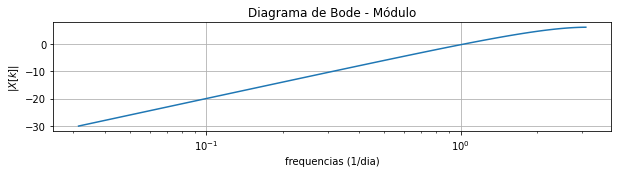

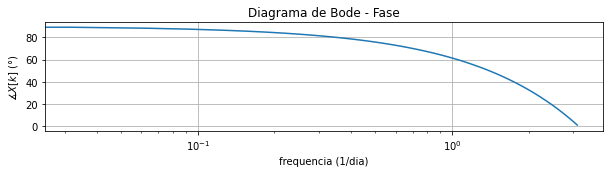

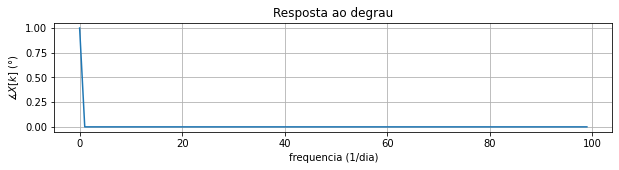

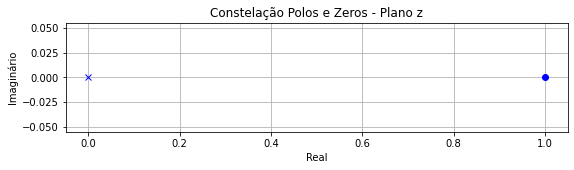

In [148]:
### SEU CÓDIGO COMEÇA AQUI ###

#define sistema de diferenças regressivas
num1 = [1, -1];
den1 = [1, 0];

#passa pelo sistema 1
sys1 = signal.dlti(num1, den1);
#Transforma pro dominio Z atraves do Bode
w1, mag1, phase1 = signal.dbode (sys1); 
#passa degrau pelo sistema
a1, b1 = signal.dstep(sys1);
#monta plano z (polos, zeros e ganhos)
z1, p1, k1 = signal.tf2zpk(num1, den1);

#bode modulo
plt.figure(figsize=(10,2))
plt.semilogx(w1, mag1)
#plt.xlim(10**(-2),1)
plt.xlabel("frequencias (1/dia)")
plt.ylabel("$|X[k]|$")
plt.title("Diagrama de Bode - Módulo")
plt.grid(1);

#bode Fase
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (1/dia)")
plt.title("Diagrama de Bode - Fase")
plt.semilogx(w1, phase1)
plt.grid(1);

#Resposta ao degrau
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (1/dia)")
plt.title("Resposta ao degrau")
plt.plot(a1, np.squeeze(b1))
plt.grid(1);

#Constelação de polos e zeros no plano z
plt.figure(figsize = (9, 2))
plt.title("Constelação Polos e Zeros - Plano z")
plt.xlabel("Real")
plt.ylabel("Imaginário")
plt.plot(np.real(p1), np.imag(p1), "bx"); 
plt.plot(np.real(z1), np.imag(z1), "bo");
plt.grid(which = "both");


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Diagrama de Bode do **sistema de diferenças regressivas**
1. Resposta ao degrau
1. Constelação de polos e zeros

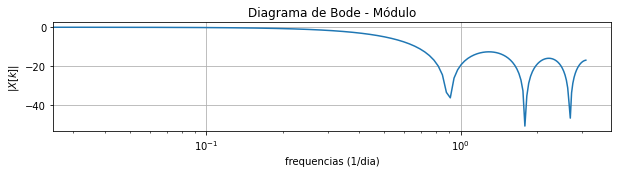

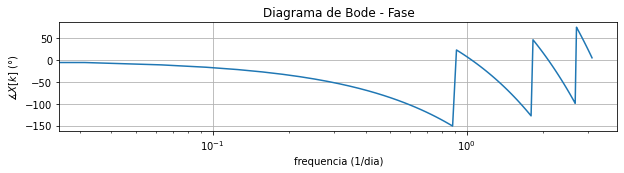

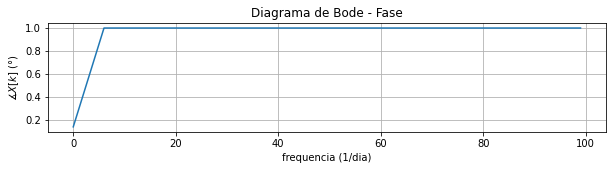

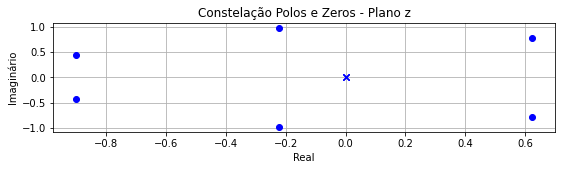

In [149]:
### SEU CÓDIGO COMEÇA AQUI ###

#Sistema média móvel causal de 7 amostras (uma semana)
num2 = [1, 1, 1, 1, 1, 1, 1];
den2 = [7, 0, 0, 0, 0, 0, 0];

#passa pelo sistema 1
sys2 = signal.dlti(num2, den2);
#Transforma pro dominio Z atraves do Bode
w2, mag2, phase2 = signal.dbode (sys2); 
#passa degrau pelo sistema
a2, b2 = signal.dstep(sys2);
#monta plano z (polos, zeros e ganhos)
z2, p2, k2 = signal.tf2zpk(num2, den2);

#bode modulo
plt.figure(figsize=(10,2))
plt.semilogx(w2, mag2)
#plt.xlim(10**(-2),1)
plt.xlabel("frequencias (1/dia)")
plt.ylabel("$|X[k]|$")
plt.title("Diagrama de Bode - Módulo")
plt.grid(1);

#bode Fase
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (1/dia)")
plt.title("Diagrama de Bode - Fase")
plt.semilogx(w2, phase2)
plt.grid(1);

#Resposta ao degrau
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (1/dia)")
plt.title("Diagrama de Bode - Fase")
plt.plot(a2, np.squeeze(b2))
plt.grid(1);

#Constelação de polos e zeros no plano z
plt.figure(figsize = (9, 2))
plt.title("Constelação Polos e Zeros - Plano z")
plt.xlabel("Real")
plt.ylabel("Imaginário")
plt.plot(np.real(p2), np.imag(p2), "bx"); 
plt.plot(np.real(z2), np.imag(z2), "bo");
plt.grid(which = "both");

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Diagrama de Bode do **sistema média móvel causal**
1. Resposta ao degrau
1. Constelação de polos e zeros

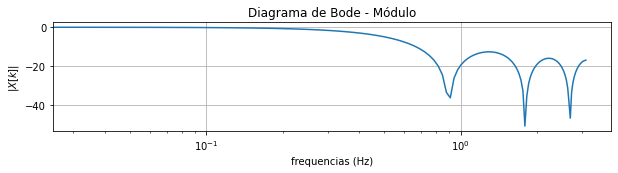

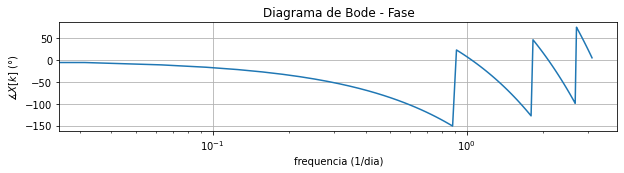

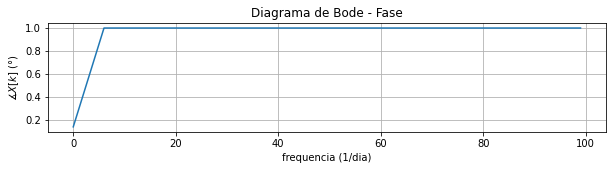

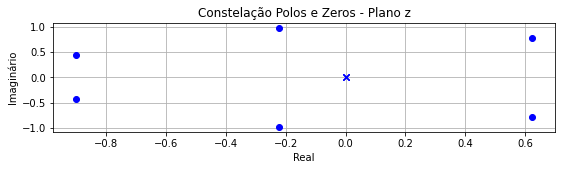

In [150]:
### SEU CÓDIGO COMEÇA AQUI ###

#Sistema média móvel não causal de 7 amostras (uma semana)
num3 = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7];
den3 = [1, 0, 0, 0, 0, 0, 0];

sys3 = signal.dlti(num3, den3);
w3, mag3, phase3 = signal.dbode (sys3); #Transforma pro dominio Z atraves do Bode
a3, b3 = signal.dstep(sys3)
z3, p3, k3 = signal.tf2zpk(num3, den3)

#bode modulo
plt.figure(figsize=(10,2))
plt.semilogx(w3, mag3)
#plt.xlim(10**(-2),1)
plt.xlabel("frequencias (Hz)")
plt.ylabel("$|X[k]|$")
plt.title("Diagrama de Bode - Módulo")
plt.grid(1);

#bode Fase
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (1/dia)")
plt.title("Diagrama de Bode - Fase")
plt.semilogx(w3, phase3)
plt.grid(1);

#Resposta ao degrau
plt.figure(figsize=(10,2))
plt.ylabel("$\measuredangle X[k]$ (°)")
plt.xlabel("frequencia (1/dia)")
plt.title("Diagrama de Bode - Fase")
plt.plot(a3, np.squeeze(b3))
plt.grid(1);

#Constelação de polos e zeros no plano z
plt.figure(figsize = (9, 2))
plt.title("Constelação Polos e Zeros - Plano z")
plt.xlabel("Real")
plt.ylabel("Imaginário")
plt.plot(np.real(p3), np.imag(p3), "bx"); 
plt.plot(np.real(z3), np.imag(z3), "bo");
plt.grid(which = "both");
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Diagrama de Bode do **sistema média móvel não causal**
1. Resposta ao degrau
1. Constelação de polos e zeros
---

## Passando os dados pelos sistemas

Abaixo, passe os dados de morte por covid pelos três sistemas implementados. Faça os seguinte gráficos:
1. Compare o sinal, no domínio do tempo, antes e após passar pelo sistema
1. Compare o módulo da FFT do sinal, no domínio do frequência, antes e após passar pelo sistema

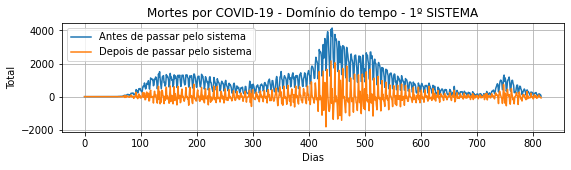

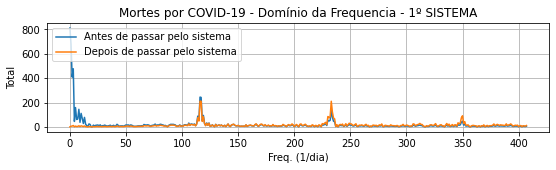

In [151]:
### SEU CÓDIGO COMEÇA AQUI ###

#sinal pelo sistema 1
ty1_brMor, y1_brMor = signal.dlsim(sys1, y_brMor)

plt.figure(figsize = (9,2))
#plota sinais antes e depois do sistema
plt.plot(ty_brMor, y_brMor);
plt.plot(ty_brMor, y1_brMor);
plt.title("Mortes por COVID-19 - Domínio do tempo - 1º SISTEMA")
plt.ylabel("Total")
plt.xlabel("Dias")
plt.legend(["Antes de passar pelo sistema","Depois de passar pelo sistema"], loc=2)
plt.grid(1);

#passa sinais antes e depois do sistema para a frequencia pela FFT
mag_mor, pha_mor, f_mor = fourier(y_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia
y1_brMor=y1_brMor.reshape(-1)
mag_morte, pha_morte, f_morte = fourier(y1_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia

#plota grafico antes e depois do sistema na frequencia
plt.figure(figsize = (9,2))
plt.plot(mag_mor)
plt.plot(mag_morte)
plt.title("Mortes por COVID-19 - Domínio da Frequencia - 1º SISTEMA")
plt.ylabel("Total")
plt.xlabel("Freq. (1/dia)")
plt.legend(["Antes de passar pelo sistema","Depois de passar pelo sistema"], loc=2)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico no domínio do tempo da entrada e saída de cada sistema sistema
1. Gráfico de FFT entrada e saída de cada sistema sistema

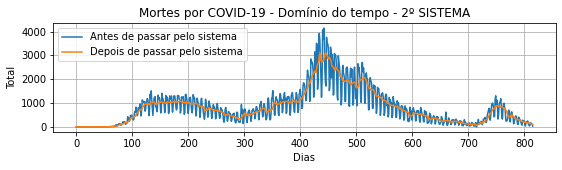

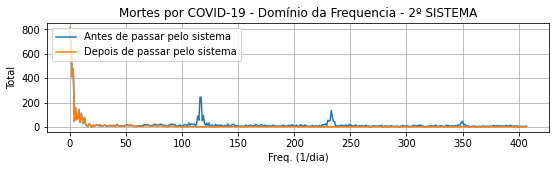

In [152]:
### SEU CÓDIGO COMEÇA AQUI ###
#sinal pelo sistema 2
ty2_brMor, y2_brMor = signal.dlsim(sys2, y_brMor)
plt.figure(figsize = (9,2))
#plota sinais antes e depois do sistema
plt.plot(ty_brMor, y_brMor);
plt.plot(ty_brMor, y2_brMor);
plt.title("Mortes por COVID-19 - Domínio do tempo - 2º SISTEMA")
plt.ylabel("Total")
plt.xlabel("Dias")
plt.legend(["Antes de passar pelo sistema","Depois de passar pelo sistema"], loc=2)
plt.grid(1);

#passa sinais antes e depois do sistema para a frequencia pela FFT
mag_mor2, pha_mor2, f_mor2 = fourier(y_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia
y2_brMor=y2_brMor.reshape(-1)
mag_morte2, pha_morte2, f_morte2 = fourier(y2_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia

#plota grafico antes e depois do sistema na frequencia
plt.figure(figsize = (9,2))
plt.plot(mag_mor2)
plt.plot(mag_morte2)
plt.title("Mortes por COVID-19 - Domínio da Frequencia - 2º SISTEMA")
plt.ylabel("Total")
plt.xlabel("Freq. (1/dia)")
plt.legend(["Antes de passar pelo sistema","Depois de passar pelo sistema"], loc=2)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico no domínio do tempo da entrada e saída de cada sistema sistema
1. Gráfico de FFT entrada e saída de cada sistema sistema

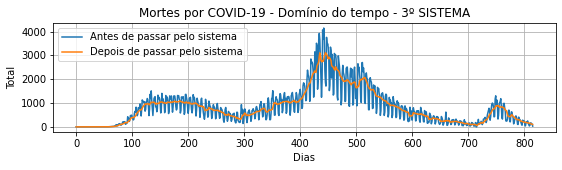

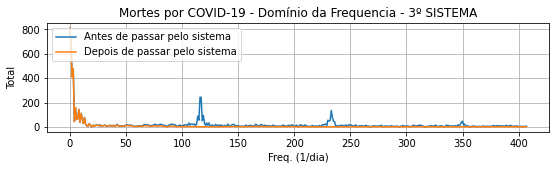

In [153]:
### SEU CÓDIGO COMEÇA AQUI ###
#sinal pelo sistema 3
ty3_brMor, y3_brMor = signal.dlsim(sys3, y_brMor)
plt.figure(figsize = (9,2))
#plota sinais antes e depois do sistema
plt.plot(ty_brMor, y_brMor);
plt.plot(ty_brMor, y3_brMor);
plt.title("Mortes por COVID-19 - Domínio do tempo - 3º SISTEMA")
plt.ylabel("Total")
plt.xlabel("Dias")
plt.legend(["Antes de passar pelo sistema","Depois de passar pelo sistema"], loc=2)
plt.grid(1);

#passa sinais antes e depois do sistema para a frequencia pela FFT
mag_mor3, pha_mor3, f_mor3 = fourier(y_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia
y3_brMor=y3_brMor.reshape(-1)
mag_morte3, pha_morte3, f_morte3 = fourier(y3_brMor, ty_brMor, Hz=True, dB=False, deg=False, Nfft=None); #gera o grafico da entrada em frequencia

#plota grafico antes e depois do sistema na frequencia
plt.figure(figsize = (9,2))
plt.plot(mag_mor3)
plt.plot(mag_morte3)
plt.title("Mortes por COVID-19 - Domínio da Frequencia - 3º SISTEMA")
plt.ylabel("Total")
plt.xlabel("Freq. (1/dia)")
plt.legend(["Antes de passar pelo sistema","Depois de passar pelo sistema"], loc=2)
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico no domínio do tempo da entrada e saída de cada sistema sistema
1. Gráfico de FFT entrada e saída de cada sistema sistema
___

# Concluões

**1 - O sistema média móvel pode ser classificado como qual tipo de filtro? Justifique baseado no gráfico apresentado de resposta em frequência do sistema.**

**Resposta:**

`[escreva aqui sua resposta]`

**2 - O sistema de diferenças regressivas pode ser classificado como qual tipo de filtro? Justifique baseado no gráfico apresentado de resposta em frequência do sistema.**

**Resposta:**

`[escreva aqui sua resposta]`

______________

# Desafio (opcional)

Esta é uma atividade exploratória. Use os seus conhecimentos (e também de pesquisas na internet) sobre processamento de sinais discretos para comparar os números da covid no Brasil com outros países do mundo, como a média mundial, referências de outros países do mesmo "bloco", do mesmo continente, etc. Use livremente seus conhecimentos sobre processamento de sinais para extrair informações interessantes dos dados da covid. Mostre e comente abaixo resultados interessantes que tenha extraído.

In [154]:
### SEU CÓDIGO COMEÇA AQUI ###
...
### FIM DO CÓDIGO ###

Bom trabalho :c)